In [ ]:
import numpy as np
import pandas as pd

import kagglehub
import os

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#path=kagglehub.dataset_download("siddharthss/crop-recommendation-dataset")

100%|██████████| 63.7k/63.7k [00:00<00:00, 48.1MB/s]

Extracting files...


In [ ]:
#data=os.path.join(path,"Crop_recommendation.csv")


In [ ]:
df=pd.read_csv("/content/Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
print(df.shape)
print(df.columns)
df.info()
df.describe()

(2200, 8)
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
X=df[['N','P','K','temperature','humidity','ph','rainfall']]
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['label'])

# Check classes
print("Classes:", le.classes_[:10])  # show first 10 crop names


Classes: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans']


In [ ]:
y

array([20, 20, 20, ...,  5,  5,  5])

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2200, 7)
y shape: (2200,)


In [ ]:
# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (1760, 7)
Test size: (440, 7)


In [ ]:
# SVM Classifier with RBF kernel
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
# Predictions
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9840909090909091


In [ ]:
# --- 9. Make Predictions and Evaluate (RBF Kernel) ---
print("--- Evaluation: RBF Kernel SVM ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")

conf_matrix_rbf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_rbf)
print("\n")

target_names = [str(i) for i in sorted(df['label'].unique())]
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


--- Evaluation: RBF Kernel SVM ---
Accuracy: 0.98

Confusion Matrix:
[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        20
           8       0.80      1.00      0.89        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      0.95      0.97        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
   

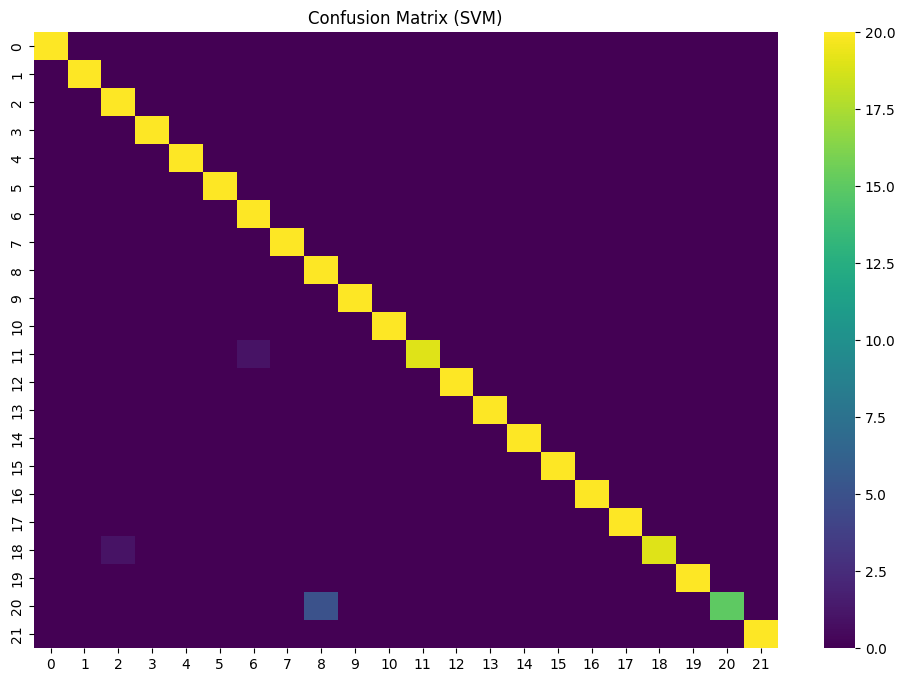

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(12,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=False, cmap="viridis")
plt.title("Confusion Matrix (SVM)")
plt.show()

In [ ]:
sample = pd.DataFrame([[90, 40, 40, 25, 70, 6.5, 200]],
                      columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

pred_encoded = svm_model.predict(sample)
pred_crop = le.inverse_transform(pred_encoded)

print("Recommended Crop:", pred_crop[0])

Recommended Crop: banana


In [ ]:
import pickle

# Save the trained model
with open("svm_crop_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

print("✅ Model saved as svm_crop_model.pkl")


✅ Model saved as svm_crop_model.pkl


In [ ]:
import joblib

# Save
joblib.dump((svm_model, le), "svm_crop_pipeline.pkl")

# Load
model, le = joblib.load("svm_crop_pipeline.pkl")